# Laboratorio 3.2: Clustering

**Autores:** Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Mabel Sanchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

**Fecha:** Octubre 2021

## ============= Declaración de compromiso ético =============

Nosotros ****José Luis Cádiz, Maximiliano Jorquera**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 2) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura del laboratorio

Este laboratorio consiste en 2 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección para evaluar los métodos de clustering.

# Parte 1: Teoría

**1.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

> **Respuesta**: Lo que hace bisecting k-means, es dividir el conjunto de todos los puntos en 2 clusters, escoger uno de los 2 para ser dividido, e iterar hasta producir K clusters (cada división se obtiene ejecutando K-means con k=2). Esto soluciona el problema de inicialización de centroides, ya que realiza varios intentos de bisección y toma la bisección de menor SSE, además que solo consideran 2 centroides en cada paso. Si se registra la secuencia de clusters bisectados, se puede producir un clustering jerárquico.

**2.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
    >**Respuesta**: 
    - Ventajas: Es un algoritmo sencillo y en general la convergencia del algoritmo sucede con pocas iteraciones.
    - Desventajas: Si sus centroides son escogidos aleatoriamente, diferentes ejecuciones de k-means producen distintos valores de SSE, lo cual dificulta encontrar la cantidad optima de clusters. Tiene problemas con clusters de diferentes tamaño y densidades, y con clusters con formas no esfericas.
    
* Clustering Jerarquico Aglomerativo
    >**Respuesta:**
    - Ventajas: No tiene que suponer un número a priori de clusters ya que se puede obtener cualquier número de clusters "cortando" su dendograma en el nivel apropiado.
    - Desventajas: No hay una función objetivo que sea directamente minimizada, por lo que no se asegura una elección optima mediante el metodo visual del dendograma. Según sus diferentes definiciones de distancia se pueden presentar sensibilidades a ruido y outliers, dificultad para manejar clusters de distinto tamaño y se pueden romper clusters grandes.

**3.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.
> **Respuesta:**
La primera forma es la matriz de similitud (proximidad), esta matriz permite ver qué tan cerca están los puntos pertenecientes a un cluster entre sí, y simultaneamente ver qué tan lejos están los puntos de un cluster de los otros clusters. Si se utilizan colores para pintar los valores más altos de un color más oscuro y los más bajos de un color más claro, si los clusters son buenos veríamos cuadrados de colores oscuros bien definidos en la diagonal de la matriz y cuadrados de colores claros bien definidos en el resto de la matriz, si los clusters son malos, no veríamos cuadrados definidos y los colores estarían bien repartidos en toda la matriz.
La segunda forma es Silhouette, que es un coeficiente que calcula para cada punto: su distancia promedio al resto de los puntos en su mismo cluster, digamos a. En ingles esto se llama mean intra-cluster distance y también calcula su distancia promedio a todos los puntos del cluster más cercano, digamos b. En ingles esto se llama mean nearest-cluster distance. Esta métrica esta en un rango entre -1 y 1, donde 1 significa que algo está bien asignado, -1 significa que algo está mal asignado porque hay otro cluster más similar, y 0 significa que hay solapamiento de clusters.
La tercera forma es la de Información mutua, que ve la dependencia entre 2 distribuciones, nuestra distribución real que conocemos (que casi nunca tenemos), y la que nos dio nuestro método de clustering. Algunas versiones son: Normalized Mutual Information (NMI), y Adjusted Mutual Information (AMI), que están normalizados y entregan un valor entre 0-1, mientras más cercano a 1, mejor son los clusters.

# Parte 2: Clustering

Para esta parte del Laboratorio vamos a evaluar dos métodos de clustering: `k-means` y `dbscan`. Ejecute las siguientes líneas para descargar y seleccionar los datos.

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
dataframe = pd.read_csv("http://users.dcc.uchile.cl/~hsarmien/mineria/datasets/d31.txt", sep="\t", names = ["V1", "V2"])
X = pd.DataFrame(dataframe).to_numpy()
X

array([[25.0514,  5.7475],
       [26.6614,  7.3414],
       [25.2653,  6.2466],
       ...,
       [ 5.276 , 17.2475],
       [ 6.4444, 16.2033],
       [ 7.162 , 18.1836]])

## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente el método del codo.

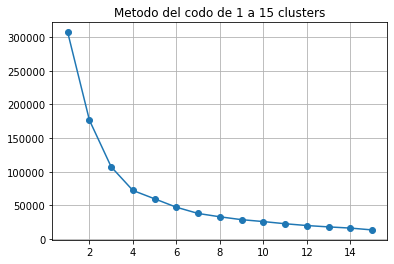

In [2]:
# Respuesta
random_state = 20

sse = []
clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**2.** Cuántos clusters propone usar para este dataset? Escoja **dos opciones** y justifique su elección.

> **Respuesta: Se proponen 4 y 8 clusters, debido a que partir de 4 clusters el SSE disminuye en menor grado y para 8 clusters se puede obtener una agrupación con menor SSE sin necesidad de aumentar demasiado la cantidad de grupos.**

**3.** Genere un gráfico para cada uno de los **dos `k` elegidos** para tener una representación visual de los clusters.

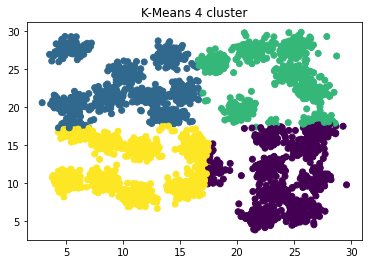

In [3]:
# Respuesta 4 clusters

kmeans4 = KMeans(n_clusters=4, n_init=20, max_iter=300, random_state=random_state)
kmeans4.fit(X) 
y_pred = kmeans4.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-Means 4 cluster")
plt.show()

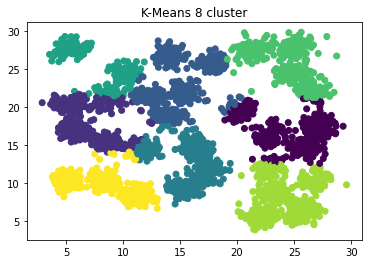

In [4]:
# Respuesta 8 clusters

kmeans8 = KMeans(n_clusters=8, n_init=20, max_iter=300, random_state=random_state)
kmeans8.fit(X) 
y_pred = kmeans8.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-Means 8 cluster")
plt.show()

## DBSCAN

**1.** Usando los datos anteriores, ejecute DBSCAN y genere un gráfico con los clusters obtenidos. Use los parámetros `eps=0.9` y `min_samples=5`.

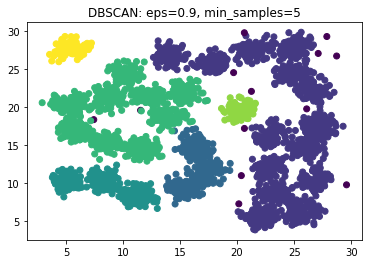

In [5]:
# Respuesta
eps = 0.9
min_samples = 5
dbscan9 = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan9.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

**2.** Estime el valor `eps` usando el método de la rodilla (basado en KNN). La idea de este procedimiento es calcular la distancia promedio de cada punto a sus `k` vecinos más cercanos los cuales son graficados en orden ascendente. El objetivo es determinar la _rodilla_, que corresponde al valor óptimo de `eps`. Pruebe varios valores de `y` utilizando el siguiente código y adjunte el gráfico para el mejor `y` que usted considere. Explique porque escogio el valor `y` como mejor opción.

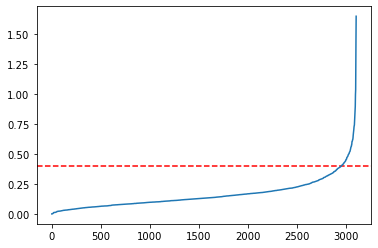

In [6]:
# Metodo de la rodilla
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.4, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.plot(distances)
plt.show()

> **Respuesta: Elegimos eps 0.4 ya que ahí ocurre el salto de la distancia kneighbors, de este modo encontrando la cantidad de clusters apropiada.**

**3.**  Ejecute y grafique los clusters usando el método DBSCAN haciendo uso de parámetro `eps` (`y`) encontrado previamente.

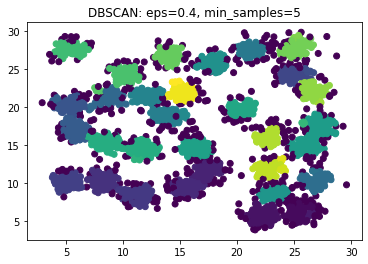

In [7]:
# Respuesta
eps = 0.4
min_samples = 5

dbscan4 = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan4.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

## Evaluación

**1.** Para evaluar clusters existen una serie de métodos y métricas. Para este laboratorio usaremos el coeficiente de Silhouette. Para cada uno de los experimentos (los dos de la parte de `kmeans` en la pregunta **3** y los dos de la parte de `dbscan` en la pregunta **1** y **3**), adjunte el código que permita obtener el Silhouette score de los modelos.

In [8]:
# Respuesta

# kmeans 4
print("Dataset X K-Means 4\t", silhouette_score(X, kmeans4.labels_))

# kmeans 8
print("Dataset X K-Means 8\t", silhouette_score(X, kmeans8.labels_))

# Dscan 0.9
_filter_label = dbscan9.labels_ >= 0
print("Dataset X DBSCAN 0.9\t", silhouette_score(X[_filter_label], dbscan9.labels_[_filter_label]))

# Dscan 0.4
_filter_label = dbscan4.labels_ >= 0
print("Dataset X DBSCAN 0.4\t", silhouette_score(X[_filter_label], dbscan4.labels_[_filter_label]))

Dataset X K-Means 4	 0.4275530173786754
Dataset X K-Means 8	 0.43656419218998543
Dataset X DBSCAN 0.9	 0.08282999133831846
Dataset X DBSCAN 0.4	 0.4489327851457516


**2.** En base a los valores del coeficiente de Silhouette obtenidos para cada método y configuración. ¿Cuál cree que es el que tiene mejor resultado? Comente al respecto basándose principalmente en los resultados.

>**Respuesta: En base a las métricas, según el que tiene mayor coeficiente de silhouette, elegimos el clustering DSCAN con epsilon=0.4. Esto significa que los puntos dentro del cluster están a una distancia pequeña entre si y a una mayor distancia entre los clusters que se generan. El peor modelo fue el DBSCAN 0.9 ya que se inició con parámetros arbitrarios que no seguian ningún tipo de criterio, mientras que los otros modelos son mejores debido a que se siguieron ciertos criterios para escoger sus parámetros.**

 **Como DBSCAN fue levemente mejor es más conveniente generar cluster por densidad más que por criterios de distancia entre puntos.**